In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Taking the data from the csv file given
text = np.loadtxt(r'ML3-Glider-M09.txt')
text

array([[ 0.0000e+00,  2.6000e-01,  2.0000e-02, ...,  2.0000e-01,
        -3.0000e-02,  1.0000e-02],
       [ 2.0000e-02,  3.2000e-01,  1.1000e-01, ...,  2.2000e-01,
         3.0000e-02, -5.0000e-02],
       [ 4.0000e-02,  3.2000e-01, -6.0000e-02, ...,  3.3000e-01,
         4.0000e-02, -3.0000e-02],
       ...,
       [ 1.1996e+02,  3.0000e-01,  4.0000e-02, ...,  3.1000e-01,
        -1.0000e-02, -2.1000e-01],
       [ 1.1998e+02,  6.0000e-02, -3.0000e-02, ...,  5.0000e-01,
        -8.0000e-02, -1.0000e-01],
       [ 1.2000e+02,  3.5000e-01,  2.1000e-01, ...,  5.5000e-01,
        -1.0000e-02, -4.0000e-02]])

In [191]:
#Initial conditions
m1,m2,m3 = 320,160,160 #in g
k1,k2,k3,k4 = 1.6, 0.8, 1.6, 1.6 #in N/m

In [190]:
#Converting to the same base (kg)
m1 = m1 / 1000
m2 = m2 / 1000
m3 = m3 / 1000

In [33]:
#Extracting the acceleration data for 1st trial
t1 = text[:,0] #Time column
a11 = text[:,1] #M1 acceleration
a21 = text[:,2] #M2 acceleration
a31 = text[:,3] #M3 acceleration

In [34]:
a12 = text[:,5] #M1 acceleration
a22 = text[:,6] #M2 acceleration
a32 = text[:,7] #M3 acceleration

In [35]:
a13 = text[:,9] #M1 acceleration
a23 = text[:,10] #M2 acceleration
a33 = text[:,11] #M3 acceleration

For this given problem, the $-\omega^2T - V$ matrix is $\begin{pmatrix} -m_1\omega^2+(k_1+k_2) & -k_2 & 0 \\ -k_2 & -m_2\omega^2+(k_2+k_3) & -k_3 \\ 0 & -k_3 & -m_3\omega^2+(k_3+k_4) \end{pmatrix}$. To find the $\omega^2$ values, the determinant of the above matrix needs to be $0$.

Analytically solving the determinant, gives 

$[-m_1\omega^2+(k_1+k_2)][(-m_2\omega^2+(k_2+k_3))(-m_3\omega^2+(k_3+k_4))-k_3^2]-k_2[(k_2(-m_3\omega^2+(k_3+k_4))] = 0$

In [260]:
#Range of frequency values
w = np.linspace(0,0.2,1000)

In [276]:
deter = []
w_s = []
zero = []
#Error margin
eps = 1e-2
for i in w:
    #Applying the formula of the above determinant
    term1 = -m1*i**2+(k1+k2)
    term2 = -m2*i**2+(k2+k3)
    term3 = -m3*i**2+(k3+k4)
    res = term1*(term2*term3-k3**2)-(term3*k2**2)
    deter.append(res)
    #Seeing which values are approximately 0
    if abs(res) <= eps:
        w_s.append(i)
        zero.append(res)

Text(0.5, 1.0, 'Determinant values as a function of $\\omega^2$')

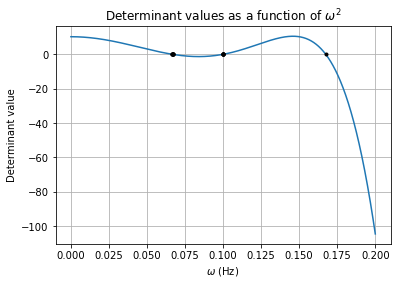

In [266]:
plt.plot(w,deter)
plt.plot(w_s,zero, 'k.')
plt.grid()
plt.xlabel("$\omega$ (Hz)")
plt.ylabel("Determinant value")
plt.title("Determinant values as a function of $\omega^2$")

In [267]:
w_s

[0.0667066706670667,
 0.06672667266726673,
 0.06674667466746675,
 0.06676667666766677,
 0.06678667866786679,
 0.0668066806680668,
 0.06682668266826683,
 0.09994999499949996,
 0.09996999699969997,
 0.09998999899989999,
 0.10001000100010002,
 0.10003000300030003,
 0.10005000500050006,
 0.16745674567456748]

As shown in the angular frequency array above, the set of points cumulate around 3 areas. $\omega = 0.067,\omega = 0.10$, and $\omega = 0.17$, approximately

Therefore, the $\omega^2$ values are $0.0045, 0.01,$ and $0.029$, respectively. These values correlate to frequencies, $f$, of 0.011, 0.016, and 0.027, respectively.

Rearranging the $-\omega^2T+V$ matrix into the unique x solutions, it was found that $x_1 = \frac{-k_2x_2}{-m_1\omega^2+(k_1+k_2)}$, $x_2$ was the form of the solution to the harmonic oscillator ODE with arbitrary amplitude, and $x_3 = \frac{k_1x_2}{-m_3\omega^2+(k_3+k_4)}$

In [268]:
#Above frequencies
w_s1 = 0.0045 #in Hz^2
w_s2 = 0.01 #in Hz^2
w_s3 = 0.029 #in Hz^2

In [274]:
#Function for x_1 coefficient
def x_1(m1,k1,k2,w_s):
    denom = -m1*w_s+(k1+k2)
    return -k2/denom
#Function for x_2 coefficient
def x_3(m3,k1,k3,k4,w_s):
    denom = -m3*w_s+(k3+k4)
    return k1/denom

In [275]:
#Finding the coefficients
#Note that the first index refers to x_1's coefficient and the second is x_3's coefficient
coeff1 = [x_1(m1,k1,k2,w_s1),x_3(m3,k1,k3,k4,w_s1)]
coeff2 = [x_1(m1,k1,k2,w_s2),x_3(m3,k1,k3,k4,w_s2)]
coeff3 = [x_1(m1,k1,k2,w_s3),x_3(m3,k1,k3,k4,w_s3)]
print("The coefficients are",coeff1, "respectively")
print("The coefficients are",coeff2, "respectively")
print("The coefficients are",coeff3, "respectively")

The coefficients are [-0.833333333333333, 0.6451612903225805] respectively
The coefficients are [1.0000000000000002, 1.0] respectively
The coefficients are [0.11627906976744186, -1.111111111111111] respectively


The three normal modes are as follows:

For $\omega = 0.067$:

$x_1 = -0.83Acos(0.067t),x_2 = Acos(0.067t), x_3 = 0.65Acos(0.067t)$ for some arbitrary amplitude $A$.

For $\omega = 0.1$:

$x_1 = Acos(0.1t),x_2 = Acos(0.1t), x_3 = Acos(0.1t)$ for some arbitrary amplitude $A$.

For $\omega = 0.17$:

$x_1 = 0.12Acos(0.17t),x_2 = Acos(0.17t), x_3 = -1.1Acos(0.17t)$ for some arbitrary amplitude $A$.